In [1]:
import pandas as pd

data = {
    'Día': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Clima': ['Soleado', 'Soleado', 'Cubierto', 'Lluvia', 'Lluvia', 'Lluvia', 'Cubierto', 'Soleado', 'Soleado', 'Lluvia', 'Soleado', 'Cubierto', 'Cubierto', 'Lluvia'],
    'Temperatura': ['Calor', 'Calor', 'Calor', 'Media', 'Fria', 'Fria', 'Fria', 'Media', 'Fria', 'Media', 'Media', 'Media', 'Calor', 'Media'],
    'Humedad': ['Alta', 'Alta', 'Alta', 'Alta', 'Normal', 'Normal', 'Normal', 'Alta', 'Normal', 'Normal', 'Normal', 'Alta', 'Normal', 'Alta'],
    'Viento': ['Débil', 'Fuerte', 'Débil', 'Débil', 'Débil', 'Fuerte', 'Fuerte', 'Débil', 'Débil', 'Débil', 'Fuerte', 'Fuerte', 'Débil', 'Fuerte'],
    '¿Juego Tenis?': ['NO', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI', 'SI', 'SI', 'SI', 'SI', 'NO']
}

df = pd.DataFrame(data)

print(df)

    Día     Clima Temperatura Humedad  Viento ¿Juego Tenis?
0     1   Soleado       Calor    Alta   Débil            NO
1     2   Soleado       Calor    Alta  Fuerte            NO
2     3  Cubierto       Calor    Alta   Débil            SI
3     4    Lluvia       Media    Alta   Débil            SI
4     5    Lluvia        Fria  Normal   Débil            SI
5     6    Lluvia        Fria  Normal  Fuerte            NO
6     7  Cubierto        Fria  Normal  Fuerte            SI
7     8   Soleado       Media    Alta   Débil            NO
8     9   Soleado        Fria  Normal   Débil            SI
9    10    Lluvia       Media  Normal   Débil            SI
10   11   Soleado       Media  Normal  Fuerte            SI
11   12  Cubierto       Media    Alta  Fuerte            SI
12   13  Cubierto       Calor  Normal   Débil            SI
13   14    Lluvia       Media    Alta  Fuerte            NO


### PRIMERO: Para cada característica o atributo, calculamos la tabla clases correspondientes al atributo seleccionado.

In [2]:
def calcular_tabla_clases(df, atributo, clase_objetivo):
    tabla_clases = {}
    valores_atributo = df[atributo].unique()
    
    for valor in valores_atributo:
        subset = df[df[atributo] == valor]
        conteo_clases = subset[clase_objetivo].value_counts().to_dict()
        tabla_clases[valor] = conteo_clases
    
    return tabla_clases

# Mostrar todas las tablas de clases para cada atributo
tabla_clases_clima = calcular_tabla_clases(df, 'Clima', '¿Juego Tenis?')
tabla_clases_temperatura = calcular_tabla_clases(df, 'Temperatura', '¿Juego Tenis?')
tabla_clases_humedad = calcular_tabla_clases(df, 'Humedad', '¿Juego Tenis?')
tabla_clases_viento = calcular_tabla_clases(df, 'Viento', '¿Juego Tenis?')

print("Tabla de clases para Clima:", tabla_clases_clima)
print("Tabla de clases para Temperatura:", tabla_clases_temperatura)
print("Tabla de clases para Humedad:", tabla_clases_humedad)
print("Tabla de clases para Viento:", tabla_clases_viento)


Tabla de clases para Clima: {'Soleado': {'NO': 3, 'SI': 2}, 'Cubierto': {'SI': 4}, 'Lluvia': {'SI': 3, 'NO': 2}}
Tabla de clases para Temperatura: {'Calor': {'NO': 2, 'SI': 2}, 'Media': {'SI': 4, 'NO': 2}, 'Fria': {'SI': 3, 'NO': 1}}
Tabla de clases para Humedad: {'Alta': {'NO': 4, 'SI': 3}, 'Normal': {'SI': 6, 'NO': 1}}
Tabla de clases para Viento: {'Débil': {'SI': 6, 'NO': 2}, 'Fuerte': {'NO': 3, 'SI': 3}}


### SEGUNDO: Calculamos la efectividad de los subvalores según un atributo a través de la suma parcial de la Entropía según sus rangos definidos.

In [3]:
import math

def calcular_entropia(conteo_clases):
    total = sum(conteo_clases.values())
    entropia = 0.0
    for conteo in conteo_clases.values():
        probabilidad = conteo / total
        entropia -= probabilidad * math.log2(probabilidad) if probabilidad > 0 else 0
    return entropia

# Mostrar la entropía para cada tabla de clases
entropia_clima = {valor: calcular_entropia(conteo) for valor, conteo in tabla_clases_clima.items()}
entropia_temperatura = {valor: calcular_entropia(conteo) for valor, conteo in tabla_clases_temperatura.items()}
entropia_humedad = {valor: calcular_entropia(conteo) for valor, conteo in tabla_clases_humedad.items()}
entropia_viento = {valor: calcular_entropia(conteo) for valor, conteo in tabla_clases_viento.items()}

print("Entropía para Clima:", entropia_clima)
print("Entropía para Temperatura:", entropia_temperatura)
print("Entropía para Humedad:", entropia_humedad)
print("Entropía para Viento:", entropia_viento)


Entropía para Clima: {'Soleado': 0.9709505944546686, 'Cubierto': 0.0, 'Lluvia': 0.9709505944546686}
Entropía para Temperatura: {'Calor': 1.0, 'Media': 0.9182958340544896, 'Fria': 0.8112781244591328}
Entropía para Humedad: {'Alta': 0.9852281360342515, 'Normal': 0.5916727785823275}
Entropía para Viento: {'Débil': 0.8112781244591328, 'Fuerte': 1.0}


### TERCERO: Calculamos la ganancia de información de cada característica (o atributo). La ganancia de información es la reducción esperada en entropía al seleccionar un atributo


In [4]:
def calcular_ganancia_informacion(df, atributo, clase_objetivo):
    total_registros = len(df)
    entropia_inicial = calcular_entropia(df[clase_objetivo].value_counts().to_dict())
    
    tabla_clases = calcular_tabla_clases(df, atributo, clase_objetivo)
    
    entropia_ponderada = 0.0
    for valor, conteo_clases in tabla_clases.items():
        subset_size = sum(conteo_clases.values())
        entropia_subset = calcular_entropia(conteo_clases)
        entropia_ponderada += (subset_size / total_registros) * entropia_subset
    
    ganancia_informacion = entropia_inicial - entropia_ponderada
    return ganancia_informacion

# Mostrar la ganancia de información para cada atributo
ganancia_clima = calcular_ganancia_informacion(df, 'Clima', '¿Juego Tenis?')
ganancia_temperatura = calcular_ganancia_informacion(df, 'Temperatura', '¿Juego Tenis?')
ganancia_humedad = calcular_ganancia_informacion(df, 'Humedad', '¿Juego Tenis?')
ganancia_viento = calcular_ganancia_informacion(df, 'Viento', '¿Juego Tenis?')

print("Ganancia de información para Clima:", ganancia_clima)
print("Ganancia de información para Temperatura:", ganancia_temperatura)
print("Ganancia de información para Humedad:", ganancia_humedad)
print("Ganancia de información para Viento:", ganancia_viento)

Ganancia de información para Clima: 0.24674981977443933
Ganancia de información para Temperatura: 0.02922256565895487
Ganancia de información para Humedad: 0.15183550136234159
Ganancia de información para Viento: 0.04812703040826949


### CUARTO: Seleccionamos como nodo raíz aquel atributo que tenga la mayor ganancia de información.


In [5]:
ganancias = {
    'Clima': ganancia_clima,
    'Temperatura': ganancia_temperatura,
    'Humedad': ganancia_humedad,
    'Viento': ganancia_viento
}

nodo_raiz = max(ganancias, key=ganancias.get)
print("El nodo raíz seleccionado es:", nodo_raiz)



El nodo raíz seleccionado es: Clima


In [ ]:
# Definir Arbol de Decisión

class NodoDecision:
    def __init__(self, atributo=None, valor=None, hijos=None, clase=None):
        self.atributo = atributo  # Atributo para dividir
        self.valor = valor        # Valor del atributo para este nodo
        self.hijos = hijos or {}  # Hijos del nodo (subárboles)
        self.clase = clase        # Clase si es un nodo hoja

# Construir el árbol de decisión recursivamente (esbozo)
def construir_arbol(df, atributos, clase_objetivo):
    clases = df[clase_objetivo].unique()
    if len(clases) == 1:
        return NodoDecision(clase=clases[0])
    
    if not atributos:
        clase_mayoria = df[clase_objetivo].mode()[0]
        return NodoDecision(clase=clase_mayoria)
    
    ganancias = {atributo: calcular_ganancia_informacion(df, atributo, clase_objetivo) for atributo in atributos}
    mejor_atributo = max(ganancias, key=ganancias.get)
    
    nodo = NodoDecision(atributo=mejor_atributo)
    valores_unicos = df[mejor_atributo].unique()
    
    for valor in valores_unicos:
        subset = df[df[mejor_atributo] == valor]
        if subset.empty:
            clase_mayoria = df[clase_objetivo].mode()[0]
            nodo.hijos[valor] = NodoDecision(clase=clase_mayoria)
        else:
            atributos_restantes = [attr for attr in atributos if attr != mejor_atributo]
            nodo.hijos[valor] = construir_arbol(subset, atributos_restantes, clase_objetivo)
    
    return nodo

atributos = ['Clima', 'Temperatura', 'Humedad', 'Viento']
arbol_decision = construir_arbol(df, atributos, '¿Juego Tenis?')

# Función para imprimir el árbol de decisión
def imprimir_arbol(nodo, nivel=0):
    indentacion = "  " * nivel
    if nodo.clase is not None:
        print(f"{indentacion}Clase: {nodo.clase}")
    else:
        print(f"{indentacion}Atributo: {nodo.atributo}")
        for valor, hijo in nodo.hijos.items():
            print(f"{indentacion}Valor: {valor}")
            imprimir_arbol(hijo, nivel + 1)

print("\nÁrbol de Decisión:")
imprimir_arbol(arbol_decision)




Árbol de Decisión:
Atributo: Clima
Valor: Soleado
  Atributo: Humedad
  Valor: Alta
    Clase: NO
  Valor: Normal
    Clase: SI
Valor: Cubierto
  Clase: SI
Valor: Lluvia
  Atributo: Viento
  Valor: Débil
    Clase: SI
  Valor: Fuerte
    Clase: NO


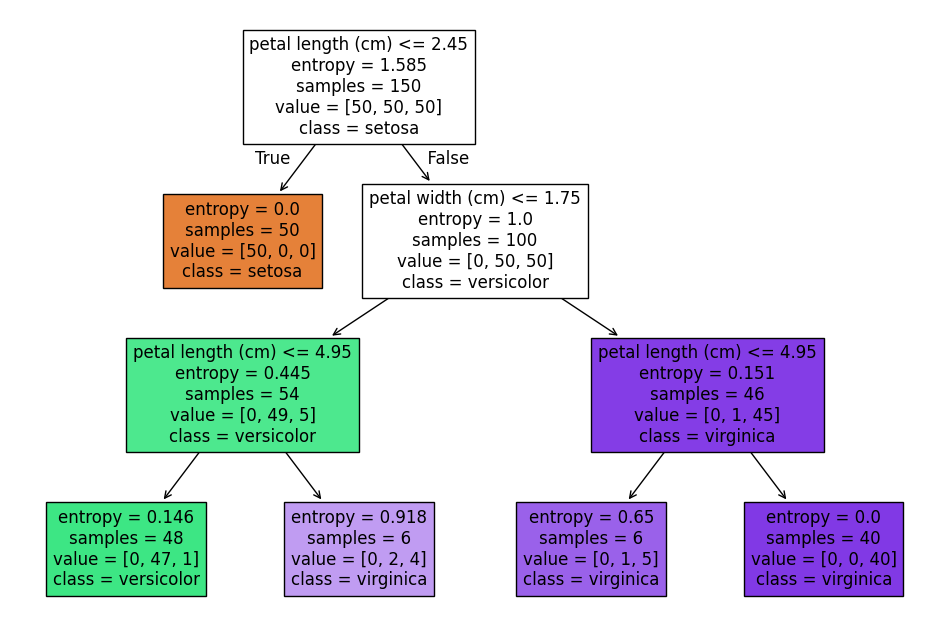

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import tree

iris = load_iris()
model = tree.DecisionTreeClassifier(criterion='entropy',
                                    min_samples_leaf=5,
                                    max_depth=3)
# Train
model.fit(iris.data, iris.target)

# Mostrar árbol
plt.figure(figsize=(12,8))
tree.plot_tree(model,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True)
plt.show()